In [28]:
# Samantha Ramsey
# AE 422 Project 2
# 11/10/2021

import numpy as np
import matplotlib.pyplot as plt

def Croot(AR, b, lam):
    '''
    root chord
    '''
    Cr = (2*b)/((1 + lam)*AR)
    return Cr

def Ctrail(Cr, lam):
    '''
    tip chord
    '''
    Ct = Cr*lam
    return Ct

def PA(Cr, Ct, b):
    '''
    planform area
    '''
    S = (1/2)*(Cr + Ct)*b
    return S

def chord(Cr, Ct, phi):
    '''
    chord
    '''
    C = Cr + (Ct - Cr)*abs(phi)
    return C

def stuff(AR, b, lam, a0):
    Cr      = Croot(AR, b, lam)
    Ct      = Ctrail(Cr, lam)
    C       = chord(Cr, Ct, cosphi)
    mu      = (C*a0)/(4*b)
    
    # solve for coefficients
    A1      = sinphi* (mu   + sinphi)
    A3      = sin3phi*(3*mu + sinphi)
    A5      = sin5phi*(5*mu + sinphi)
    A7      = sin7phi*(7*mu + sinphi)
    
    B       = np.array(mu*alpha*sinphi)
    A       = np.array([A1, A3, A5, A7]).T
    sol     = np.linalg.solve(A, B)
    
    # lift coefficient
    Cl      = sol[0]*np.pi*AR
    
    # induced drag coefficient
    Cind    = (Cl**2/(np.pi*AR)*(1 + (3*sol[1]**2/sol[0]**2) + 
                                     (5*sol[2]**2/sol[0]**2) + 
                                     (7*sol[3]**2/sol[0]**2)))
    
    # spanwise lift distribution
    deg     = np.linspace(0, 90*(np.pi/180), 100)
    Cphi    = Cr*(1 + ((lam - 1)*np.cos(deg)))
    Cphi0   = Cr*(1 + ((lam - 1)*np.cos(phi)))
    
    i1      = np.sin(1*deg)
    i3      = np.sin(3*deg)
    i5      = np.sin(5*deg)
    i7      = np.sin(7*deg)
    
    Clphi   =  2*AR*(1 + lam)*(Cr/Cphi )*(sol[0]*i1 + sol[1]*i3 + 
                                           sol[2]*i5 + sol[3]*i7)
    Clphi0  = (2*AR*(1 + lam)*(Cr/Cphi0)*(sol[0]* sinphi + sol[1]*sin3phi +
                                           sol[2]*sin5phi + sol[3]*sin7phi))
    
    return mu, sol, Cl, Cind, Cphi, Cphi0, Clphi, Clphi0

def plot(ydata, title):
    deg     = np.linspace(0, 90*(np.pi/180), 100)
    f1      = plt.figure()
    ax1     = f1.add_subplot()
    ax1.plot(np.cos(deg), ydata)
    ax1.set_title(title)
    ax1.grid()
    ax1.set_ylabel('Cl/CL')
    ax1.set_xlabel('-y/s')

def printdata(phi, mu, sol, Cl, Cind, Clrat0):
    phi = phi*(180/np.pi)
    print('%-10s %-10s %-10s %-10s %-10s %-10s' 
              %('phi', 'mu', 'A coeff', 'CL', 'C induced', 'Cl/CL'))
    for i in range(4):
        print('%-10s %-10s %-10s %-10s %-10s %-10s' 
                  %(round(phi[i], 6), round(mu[i], 6), round(sol[i], 6), 
                    round(Cl,     6), round(Cind,  6), round(Clrat0[i], 6)))

if __name__ == '__main__':
    
    AR      = 7.0            # aspect ratio
    alpha   = 6*(np.pi/180)  # angle of attack
    b       = 1              # wing span
    lam1    = 0.4            # taper ratio 1
    lam2    = 1.0            # taper ratio 2
    a0      = 2*np.pi
    
    # data in Example 7.2
    phi     = np.array([22.5, 45.0, 67.5, 90.0])*(np.pi/180)
    cosphi  = np.cos(phi)
    sinphi  = np.sin(phi)
    sin3phi = np.sin(3*phi)
    sin5phi = np.sin(5*phi)
    sin7phi = np.sin(7*phi)
       
    mu1, sol1, Cl1, Cind1, Cphi1, Cphi01, Clphi1, Clphi01 = stuff(AR, b, lam1, a0)
    mu2, sol2, Cl2, Cind2, Cphi2, Cphi02, Clphi2, Clphi02 = stuff(AR, b, lam2, a0)
    
    Clrat1  = Clphi1/Cl1
    Clrat01 = Clphi01/Cl1
    
    Clrat2  = Clphi2/Cl2
    Clrat02 = Clphi02/Cl2
    

<br>

## Lambda = 0.4 Results

phi        mu         A coeff    CL         C induced  Cl/CL     
22.5       0.142869   0.023201   0.510218   0.01196    0.851287  
45.0       0.184564   8.5e-05    0.510218   0.01196    1.054914  
67.5       0.246964   0.001044   0.510218   0.01196    1.041905  
90.0       0.320571   -0.000117  0.510218   0.01196    0.932622  


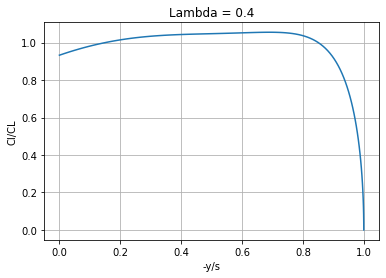

In [13]:
plot(Clrat1, 'Lambda = 0.4')
printdata(phi, mu1, sol1, Cl1, Cind1, Clrat01)

## Lambda = 1.0 Results

phi        mu         A coeff    CL         C induced  Cl/CL     
22.5       0.224399   0.022365   0.491827   0.01161    0.676155  
45.0       0.224399   0.00293    0.491827   0.01161    0.98904   
67.5       0.224399   0.000615   0.491827   0.01161    1.104935  
90.0       0.224399   0.000111   0.491827   0.01161    1.135084  


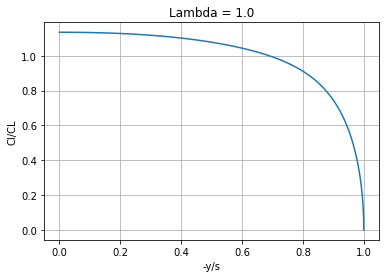

In [14]:
plot(Clrat2, 'Lambda = 1.0')
printdata(phi, mu2, sol2, Cl2, Cind2, Clrat02)